# <center>  ASTROMETRÍA I - **VÍCTOR RUBÉN SANDEZ** 

## **Profesores**: Mariano Dominguez - Mario Agustín Sgró
## **Ayudante Alumno**: Román Ciro Martín

### <center> **TRABAJO PRÁCTICO N°2** : _Distribuciones de probabilidad y remuestreo_



#### Este notebook será el paso a paso de como se fueron resolviendo los distintos ejercicios realizados durante el práctico de la asignatura **Astrometría I** de la carrera *_Licenciatura en Astronomía_* de la Facultad de Matemáticas, Astronomía, Física  y Computación de la Universidad Nacional de Córdoba.

#### Sobre todo, funcionará como bitácora de trabajo, que luego será volcada en un informe escrito a presentar para su posteriro evaluación.

### Objetivos:
#### **ADVERTENCIA**: Mucho de este trabajo está claramente hecho con ayuda de un LLM

In [3]:
%load_ext autoreload
%autoreload 2
import rubfx as rfx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from scipy.stats import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


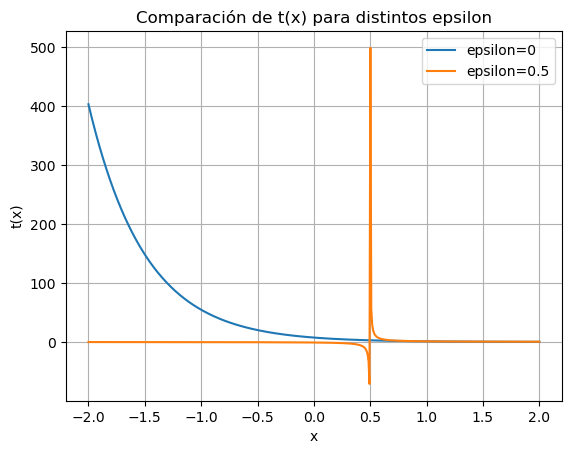

In [4]:
#Rango de x
x = np.linspace(-2, 2, 500)

#Calculo de funciones
t0 = rfx.t(x, epsilon=0, sigma=0.5, mu=1)
t1 = rfx.t(x, epsilon=1, sigma=0.5, mu=1)

#Grafico
plt.plot(x, t0, label='epsilon=0')
plt.plot(x, t1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('t(x)')
plt.legend()
plt.title('Comparación de t(x) para distintos epsilon')
plt.grid(True)
plt.show()

/home/rubsanmon/Escritorio/Facultad/FAMAF/4to/2C/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:30: RuntimeWarning: divide by zero encountered in power
  return (1+epsilon*((x-mu)/sigma))**(-1/epsilon)
/home/rubsanmon/Escritorio/Facultad/FAMAF/4to/2C/astrometria1/2025-unc-famaf-astro-astrometria1/tp2/rubfx.py:51: RuntimeWarning: invalid value encountered in multiply
  return (1/sigma) * (t_ep**(epsilon + 1)) * (np.exp(-t_ep))


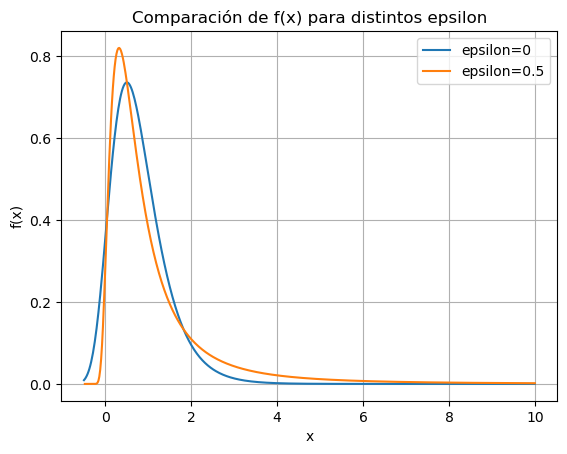

In [5]:
x = np.linspace(-0.5, 10, 500)

f0 = rfx.f(x, epsilon=0, sigma=0.5, mu=0.5)
f1 = rfx.f(x, epsilon=0.5, sigma=0.5, mu=0.5)

plt.plot(x, f0, label='epsilon=0')
plt.plot(x, f1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Comparación de f(x) para distintos epsilon')
plt.grid(True)
plt.show()

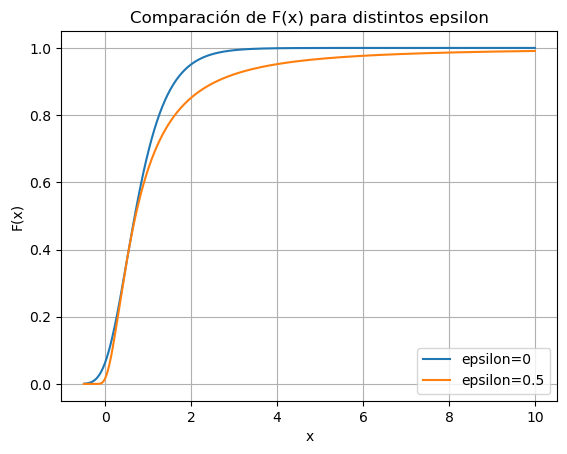

In [6]:
x = np.linspace(-0.5, 10, 500)

F0 = rfx.F(x, epsilon=0, sigma=0.5, mu=0.5)
F1 = rfx.F(x, epsilon=0.5, sigma=0.5, mu=0.5)

plt.plot(x, F0, label='epsilon=0')
plt.plot(x, F1, label='epsilon=0.5')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.show()

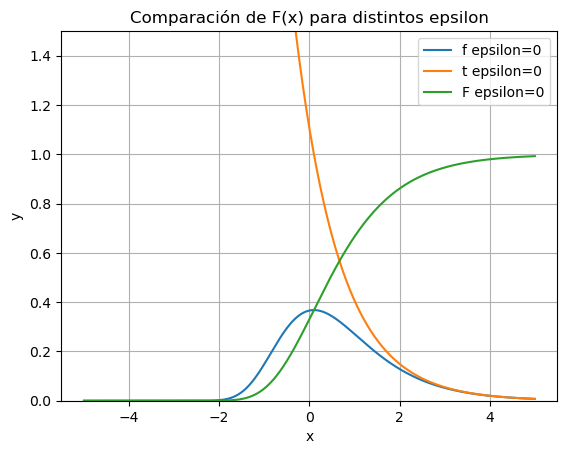

In [7]:
# EPSILON = 0

x = np.linspace(-5, 5, 500)

t0 = rfx.t(x, epsilon=0, sigma=1, mu=0.1)
f0 = rfx.f(x, epsilon=0, sigma=1, mu=0.1)
F0 = rfx.F(x, epsilon=0, sigma=1, mu=0.1)

plt.plot(x, f0, label='f epsilon=0')
plt.plot(x, t0, label='t epsilon=0')
plt.plot(x, F0, label='F epsilon=0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()

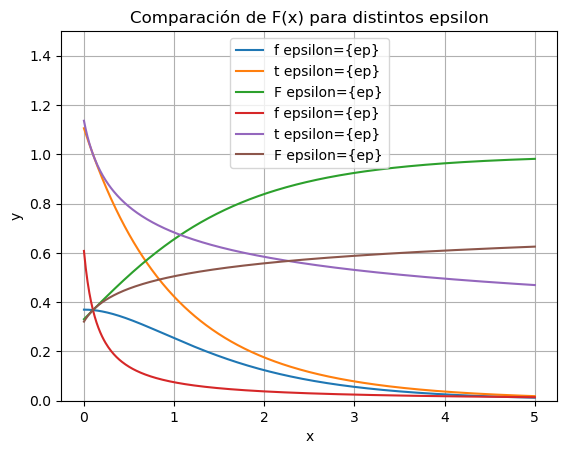

In [8]:
x = np.linspace(0, 5, 500)

ep1 = 0.1
ep2 = 4

t1 = rfx.t(x, epsilon=ep1, sigma=1, mu=0.1)
f1 = rfx.f(x, epsilon=ep1, sigma=1, mu=0.1)
F1 = rfx.F(x, epsilon=ep1, sigma=1, mu=0.1)

t2 = rfx.t(x, epsilon=ep2, sigma=1, mu=0.1)
f2 = rfx.f(x, epsilon=ep2, sigma=1, mu=0.1)
F2 = rfx.F(x, epsilon=ep2, sigma=1, mu=0.1)


plt.plot(x, f1, label='f epsilon={ep}')
plt.plot(x, t1, label='t epsilon={ep}')
plt.plot(x, F1, label='F epsilon={ep}')

plt.plot(x, f2, label='f epsilon={ep}')
plt.plot(x, t2, label='t epsilon={ep}')
plt.plot(x, F2, label='F epsilon={ep}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparación de F(x) para distintos epsilon')
plt.grid(True)
plt.ylim(0, 1.5)
plt.show()

In [9]:
# Busco generar números aleatorios con distribución f(x)
# Para esto uso las funciones generadas en el script rubfx.py

def genum(func, n, epsilon, sigma, mu):
    """
    Genera n números aleatorios distribuidos según la función de distribución acumulada F(x).

    Parámetros:
    func : función
        Función de distribución acumulada F(x).
    n : int
        Cantidad de números aleatorios a generar.
    epsilon : float
        Parámetro epsilon de la función F(x).
    sigma : float
        Parámetro sigma de la función F(x).
    mu : float
        Parámetro mu de la función F(x).

    Retorna:
    numpy.ndarray
        Array de n números aleatorios distribuidos según F(x).
    """
    # Genero n números aleatorios uniformemente distribuidos entre 0 y 1
    x = np.random.uniform(0, 1, n)
    x = np.clip(x, 1e-10, 1-1e-10)

    # Aplico la función inversa para obtener los números con la distribución deseada
    y = np.zeros(n)
    for i, _x in enumerate(x):
        y[i] = rfx.invF(_x, epsilon, sigma, mu)
    return y


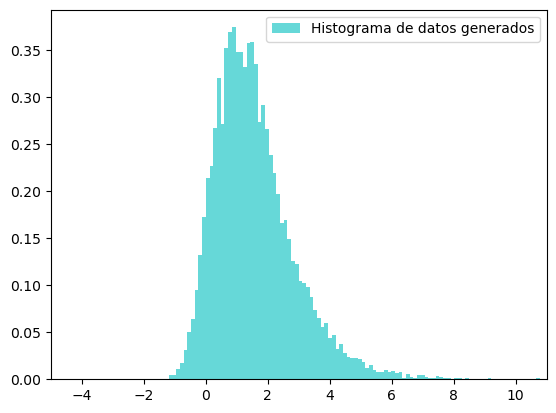

In [10]:
# Grafico los números generados

n = 10000
epsilon = 0
sigma = 1
mu = 1
x_uniform = np.random.uniform(0, 1, n)
# Evitar exactamente 0 o 1
x_uniform = np.clip(x_uniform, 1e-10, 1-1e-10)
data = np.array([rfx.invF(_x, epsilon, sigma, mu) for _x in x_uniform])
plt.hist(data, bins = 100, density=True, alpha=0.6, color='c', label='Histograma de datos generados')
plt.xlim(-5, 11)
plt.ylim()  # Si quieres limitar el eje y
plt.legend()
plt.show()



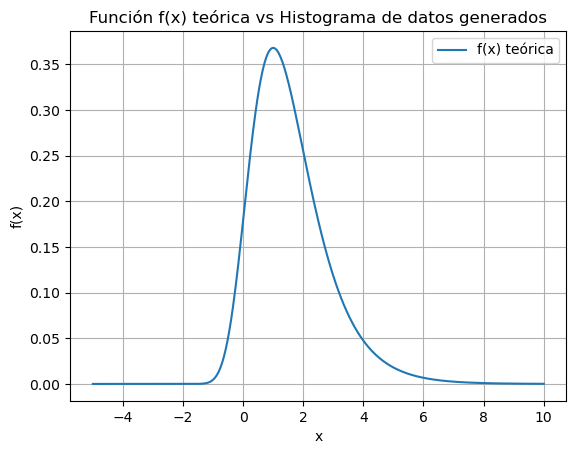

In [11]:
# Ahora quiero ver la funcion f(x) para comparar con el histograma
x = np.linspace(-5, 10, 500)
f0 = rfx.f(x, epsilon=epsilon, sigma=sigma, mu=mu)
plt.plot(x, f0, label='f(x) teórica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Función f(x) teórica vs Histograma de datos generados')
plt.grid(True)
plt.ylim()  # Si quieres limitar el eje y
plt.show()  

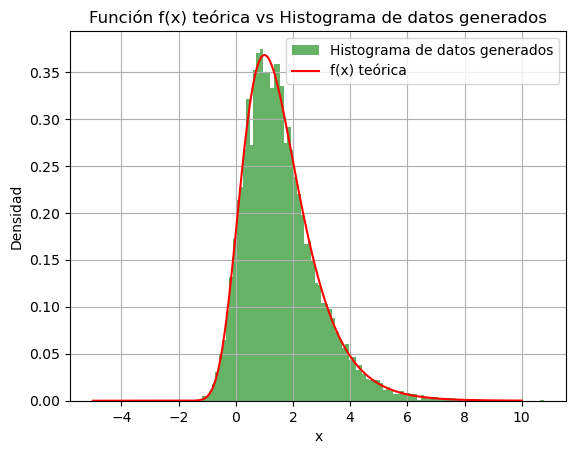

In [12]:
# AHora quiero superoponer la funcion al histograma
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Histograma de datos generados')
plt.plot(x, f0, label='f(x) teórica', color='r')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.title('Función f(x) teórica vs Histograma de datos generados')
plt.grid(True)
plt.ylim()  # Si quieres limitar el eje y
plt.show()

In [13]:
# SIMULACIÓN DE UN PROCESO DE POISSON

# Como la distribución es discreta, no tiene sentido usar la transformada inversa.
# En su lugar, usaremos la propiedad de que los tiempos entre eventos siguen una distribución exponencial.

#Utilizamos las funciones generadas en rubfx.py

=== SIMULACIÓN POISSON ===
λ = 5.0 eventos/hora, T = 3 horas
Esperados: 15.0 eventos en promedio

Resultado de esta simulación:
• Eventos generados: 18
• Tiempos de eventos: ['0.15', '0.17', '0.23', '0.36', '0.42']...


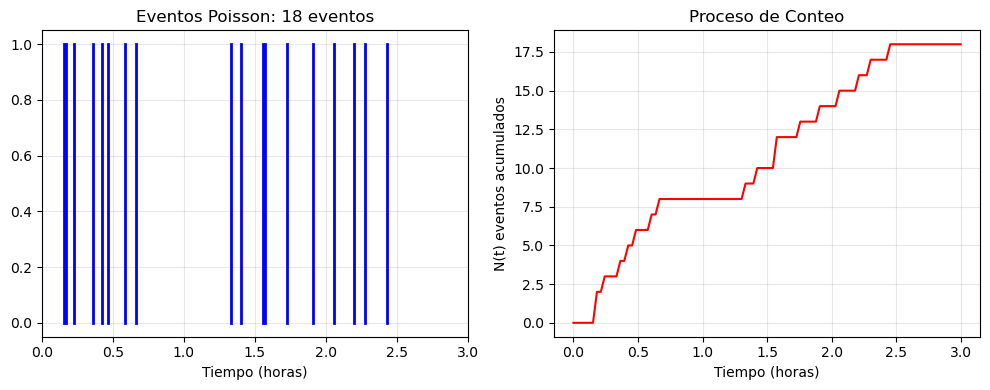


=== VERIFICACIÓN CON 1000 SIMULACIONES ===
Media teórica: 15.0
Media simulada: 14.86
Diferencia: 0.14


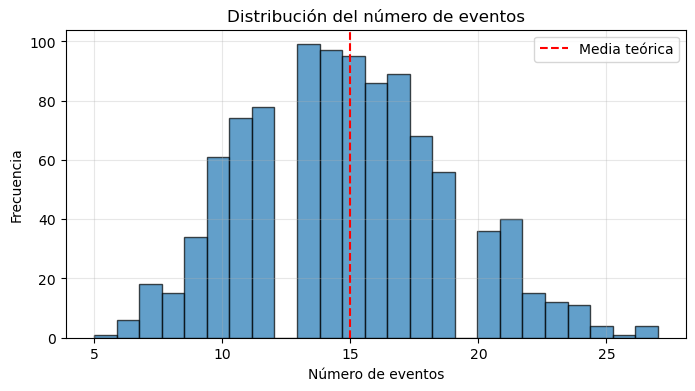

In [14]:
# PARÁMETROS DEL EJERCICIO

lambda_poisson = 5.0  # 5 eventos/hora
T_total = 3         # 3 horas

print("=== SIMULACIÓN POISSON ===")
print(f"λ = {lambda_poisson} eventos/hora, T = {T_total} horas")
print(f"Esperados: {lambda_poisson * T_total} eventos en promedio")

# SIMULACIÓN
eventos = rfx.sim_poisson(lambda_poisson, T_total)
n_eventos = len(eventos)

print(f"\nResultado de esta simulación:")
print(f"• Eventos generados: {n_eventos}")
print(f"• Tiempos de eventos: {[f'{t:.2f}' for t in eventos[:5]]}...")  # Primeros 5

# GRÁFICO 
plt.figure(figsize=(10, 4))

# Línea de tiempo
plt.subplot(1, 2, 1)
for i, t in enumerate(eventos):
    plt.plot([t, t], [0, 1], 'b-', linewidth=2)
plt.xlabel('Tiempo (horas)')
plt.title(f'Eventos Poisson: {n_eventos} eventos')
plt.xlim(0, T_total)
plt.grid(True, alpha=0.3)

# Conteo acumulado
plt.subplot(1, 2, 2)
t_points = np.linspace(0, T_total, 100)
conteo = [sum(1 for e in eventos if e <= t) for t in t_points]
plt.plot(t_points, conteo, 'r-')
plt.xlabel('Tiempo (horas)')
plt.ylabel('N(t) eventos acumulados')
plt.title('Proceso de Conteo')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# VERIFICACIÓN CON MÚLTIPLES SIMULACIONES
print("\n=== VERIFICACIÓN CON 1000 SIMULACIONES ===")

resultados = []
for i in range(1000):
    eventos = rfx.sim_poisson(lambda_poisson, T_total)
    resultados.append(len(eventos))

media_simulada = np.mean(resultados)
media_teorica = lambda_poisson * T_total

print(f"Media teórica: {media_teorica}")
print(f"Media simulada: {media_simulada:.2f}")
print(f"Diferencia: {abs(media_simulada - media_teorica):.2f}")

# Histograma simple
plt.figure(figsize=(8, 4))
plt.hist(resultados, bins=25, alpha=0.7, edgecolor='black')
plt.axvline(media_teorica, color='red', linestyle='--', label='Media teórica')
plt.xlabel('Número de eventos')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de eventos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

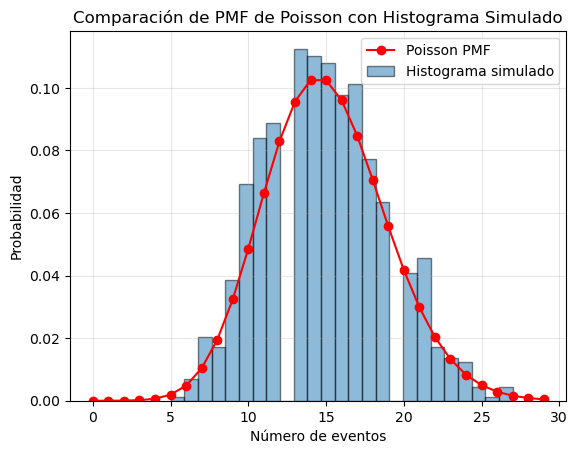

In [15]:
# Ahora quiero ver la funcion discreta de poisson para comparar con el histograma
k = np.arange(0, 30)
poisson_pmf = (math.exp(-media_teorica) * media_teorica**k) / np.array([math.factorial(i) for i in k])
plt.plot(k, poisson_pmf, 'ro-', label='Poisson PMF')
plt.hist(resultados, bins=25, density=True, alpha=0.5, edgecolor='black', label='Histograma simulado')
plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad')
plt.title('Comparación de PMF de Poisson con Histograma Simulado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== EXPERIMENTO DE BUFFON ===
Lanzamientos: 10000
Cruces: 3112
Probabilidad cruce: 0.311200
π estimado: 3.21336761
π real: 3.14159265
Error: 0.07177496
Error relativo: 2.2847%


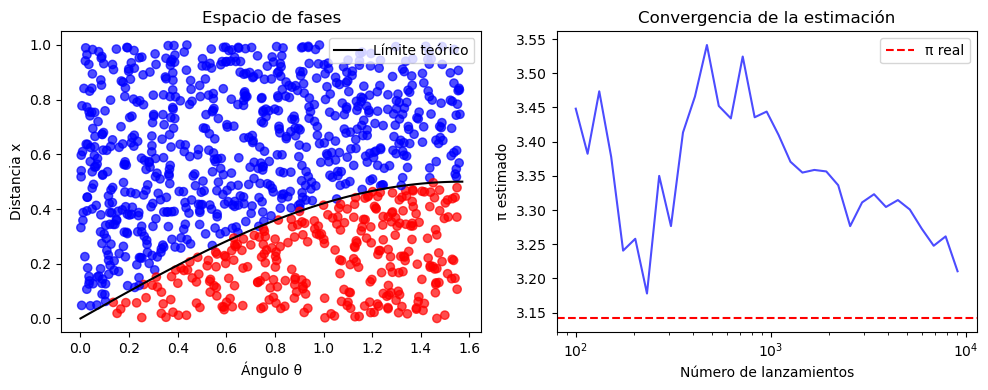

In [ ]:

# PARÁMETROS
l, t = 1.0, 2.0           # Aguja más corta que distancia entre rayas
n_lanzamientos = 10000   # Más lanzamientos = mejor estimación

# SIMULACIÓN
x = np.random.uniform(0, t/2, n_lanzamientos)      # Posición
theta = np.random.uniform(0, np.pi/2, n_lanzamientos) # Ángulo

# CONDICIÓN DE CRUCE
cruce = x <= (l/2) * np.sin(theta)
n_cruces = np.sum(cruce)

# ESTIMACIÓN DE π
prob_cruce = n_cruces / n_lanzamientos
pi_estimado = (2 * l) / (t * prob_cruce)

# RESULTADOS
print("=== EXPERIMENTO DE BUFFON ===")
print(f"Lanzamientos: {n_lanzamientos}")
print(f"Cruces: {n_cruces}")
print(f"Probabilidad cruce: {prob_cruce:.6f}")
print(f"π estimado: {pi_estimado:.8f}")
print(f"π real: {np.pi:.8f}")
print(f"Error: {abs(pi_estimado - np.pi):.8f}")
print(f"Error relativo: {abs(pi_estimado - np.pi)/np.pi*100:.4f}%")

# GRÁFICO SIMPLE
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
# Mostrar solo 100 puntos para claridad
muestra = min(1000, n_lanzamientos)
plt.scatter(theta[:muestra], x[:muestra], c=cruce[:muestra], cmap='bwr', alpha=0.7)
theta_teo = np.linspace(0, np.pi/2, 100)
plt.plot(theta_teo, (l/2)*np.sin(theta_teo), 'k-', label='Límite teórico')
plt.xlabel('Ángulo θ'); plt.ylabel('Distancia x')
plt.title('Espacio de fases')
plt.legend()

plt.subplot(1, 2, 2)
# Convergencia con incrementos
incrementos = np.logspace(2, 5, 50).astype(int)
pi_conv = []
for n in incrementos:
    if n <= n_lanzamientos:
        prob = np.sum(cruce[:n]) / n
        pi_conv.append((2*l)/(t*prob) if prob > 0 else 0)

plt.semilogx(incrementos[:len(pi_conv)], pi_conv, 'b-', alpha=0.7)
plt.axhline(np.pi, color='r', linestyle='--', label='π real')
plt.xlabel('Número de lanzamientos'); plt.ylabel('π estimado')
plt.title('Convergencia de la estimación')
plt.legend()

plt.tight_layout()
plt.show()

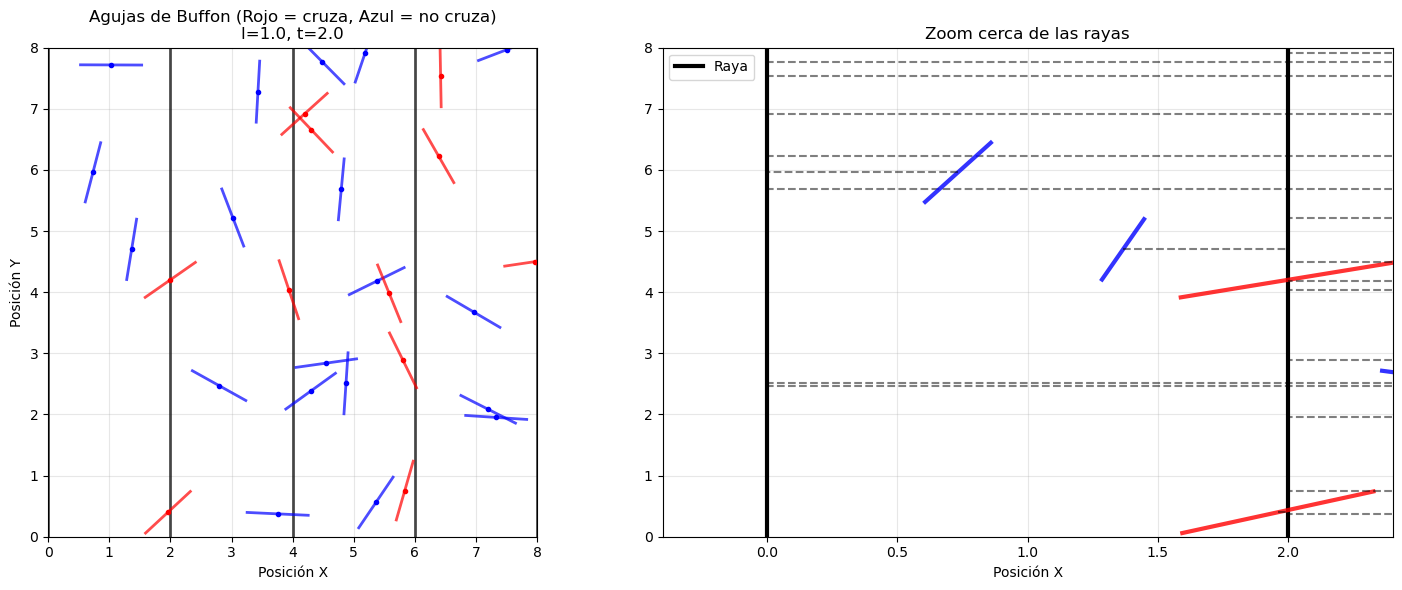

Agujas que cruzan: 11/30


In [17]:

def graficar_agujas(l, t, n_agujas=50):
    """
    Grafica agujas cayendo sobre las rayas
    """
    # Generar parámetros aleatorios para n_agujas
    x_centro = np.random.uniform(0, 4*t, n_agujas)  # Posición horizontal del centro
    y_centro = np.random.uniform(0, 4*t, n_agujas)  # Posición vertical del centro
    theta = np.random.uniform(0, 2*np.pi, n_agujas)  # Ángulo completo (0 a 2π)
    
    # Distancia a raya más cercana (solo componente x relevante para cruce)
    x_dist = np.mod(x_centro, t)
    x_dist = np.minimum(x_dist, t - x_dist)  # Distancia a raya más cercana
    
    # Determinar si cruza (considerando el ángulo agudo)
    theta_agudo = np.minimum(np.mod(theta, np.pi), np.pi - np.mod(theta, np.pi))
    cruce = x_dist <= (l/2) * np.abs(np.sin(theta))
    
    # Crear figura
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico 1: Vista general
    # Dibujar rayas verticales
    for i in range(0, int(4*t) + 1):
        ax[0].axvline(x=i*t, color='black', linewidth=2, alpha=0.7)
    
    # Dibujar agujas
    for i in range(n_agujas):
        # Calcular extremos de la aguja
        dx = (l/2) * np.cos(theta[i])
        dy = (l/2) * np.sin(theta[i])
        
        x_start, x_end = x_centro[i] - dx, x_centro[i] + dx
        y_start, y_end = y_centro[i] - dy, y_centro[i] + dy
        
        color = 'red' if cruce[i] else 'blue'
        ax[0].plot([x_start, x_end], [y_start, y_end], 
                  color=color, linewidth=2, alpha=0.7)
        # Punto central para referencia
        ax[0].plot(x_centro[i], y_centro[i], 'o', color=color, markersize=3)
    
    ax[0].set_xlim(0, 4*t)
    ax[0].set_ylim(0, 4*t)
    ax[0].set_aspect('equal')
    ax[0].set_title(f'Agujas de Buffon (Rojo = cruza, Azul = no cruza)\n{l=}, {t=}')
    ax[0].set_xlabel('Posición X')
    ax[0].set_ylabel('Posición Y')
    ax[0].grid(True, alpha=0.3)
    
    # Gráfico 2: Zoom en área interesante
    ax[1].axvline(x=0, color='black', linewidth=3, label='Raya')
    ax[1].axvline(x=t, color='black', linewidth=3)
    
    # Mostrar solo agujas cerca de las rayas
    for i in range(min(n_agujas, 20)):  # Mostrar máximo 20 para claridad
        dx = (l/2) * np.cos(theta[i])
        dy = (l/2) * np.sin(theta[i])
        
        x_start, x_end = x_centro[i] - dx, x_centro[i] + dx
        y_start, y_end = y_centro[i] - dy, y_centro[i] + dy
        
        color = 'red' if cruce[i] else 'blue'
        ax[1].plot([x_start, x_end], [y_start, y_end], 
                  color=color, linewidth=3, alpha=0.8)
        
        # Marcar distancia a raya más cercana
        raya_cercana = 0 if x_dist[i] == x_centro[i] % t else t
        ax[1].plot([x_centro[i], raya_cercana], [y_centro[i], y_centro[i]], 
                  'k--', alpha=0.5)
    
    ax[1].set_xlim(-0.2*t, 1.2*t)
    ax[1].set_ylim(0, 4*t)
    ax[1].set_title('Zoom cerca de las rayas')
    ax[1].set_xlabel('Posición X')
    ax[1].legend()
    ax[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return cruce

# Ejecutar
l, t = 1.0, 2.0
cruce = graficar_agujas(l, t, n_agujas=30)
print(f"Agujas que cruzan: {np.sum(cruce)}/{len(cruce)}")

=== BOOTSTRAP SIMPLIFICADO ===
Varianza teórica: 1.644934
Varianza estimada: 1.594085
IC 95%: [1.384897, 1.816094]
Error: 0.050849


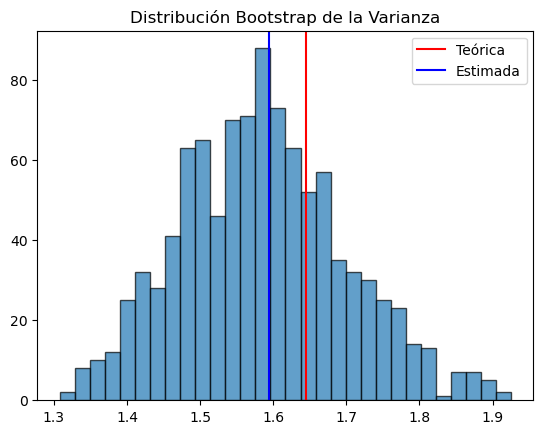

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

def bootstrap_simple(muestra, B=1000, alpha=0.05):
    """Versión simplificada del bootstrap"""
    n = len(muestra)
    varianzas = []
    
    for i in range(B):
        # Remuestreo con reemplazo
        muestra_boot = np.random.choice(muestra, n, replace=True)
        varianzas.append(np.var(muestra_boot, ddof=1))
    
    var_est = np.var(muestra, ddof=1)
    ic_inf = np.percentile(varianzas, 100 * alpha/2)
    ic_sup = np.percentile(varianzas, 100 * (1 - alpha/2))
    
    return var_est, ic_inf, ic_sup, varianzas

# Ejemplo mínimo de uso
lambda_param = 1.0
# Uso la función gumbel_r.rvs para generar la muestra y ser mas eficiente
# Esto es basicamente lo mismo que rfx.invF aplicado a uniformes
muestra = gumbel_r.rvs(scale=1/lambda_param, size=1000)
var_teorica = np.pi**2 / 6

var_est, ic_inf, ic_sup, var_boot = bootstrap_simple(muestra)

print("=== BOOTSTRAP SIMPLIFICADO ===")
print(f"Varianza teórica: {var_teorica:.6f}")
print(f"Varianza estimada: {var_est:.6f}")
print(f"IC 95%: [{ic_inf:.6f}, {ic_sup:.6f}]")
print(f"Error: {abs(var_est - var_teorica):.6f}")

# Gráfico simple
plt.hist(var_boot, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(var_teorica, color='red', label='Teórica')
plt.axvline(var_est, color='blue', label='Estimada')
plt.legend()
plt.title('Distribución Bootstrap de la Varianza')
plt.show()

EJERCICIO 10: TEST DE CHI-CUADRADO
=== PUNTO (a): SIMULACIÓN DE DATOS BINOMIALES ===
Parámetros binomial: n=10, p=0.4
Número de observaciones: 100
Datos simulados (primeros 10): [4 5 1 2 1 7 6 3 5 4]
Frecuencias observadas: [ 3  8 11 25 19 19 12  2  1  0  0]


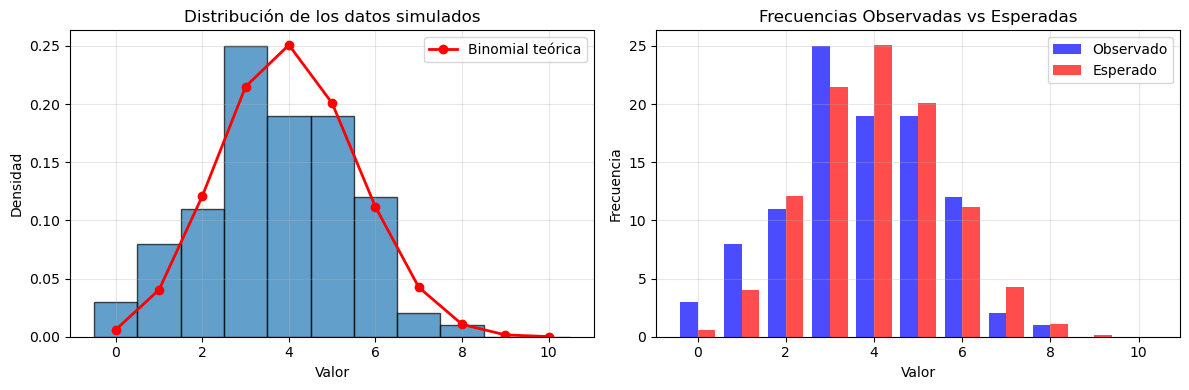


=== PUNTOS (b) y (c): ESTADÍSTICO CHI-CUADRADO Y PRUEBA DE HIPÓTESIS ===
Estadístico chi-cuadrado: 4.9992
Grados de libertad: 6
Valor-p: 0.5439
Nivel de significancia: α = 0.05
Valor crítico chi-cuadrado: 12.5916
✓ DECISIÓN: No rechazar H0 - Los datos PODRÍAN seguir la distribución binomial

--- PRUEBA DE HIPÓTESIS ---
H0: Los datos siguen una distribución Binomial(10, 0.4)
H1: Los datos NO siguen una distribución Binomial(10, 0.4)
Estadístico de prueba: χ² = 4.9992
Región de rechazo: χ² > 12.5916
Valor-p: 0.5439
Decisión: No rechazar H0


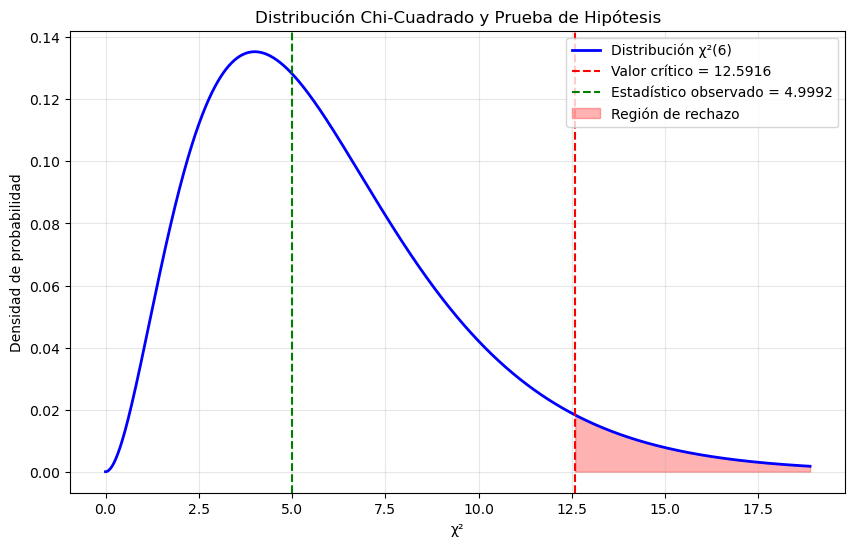


=== PUNTO (d): INTERPRETACIÓN DEL VALOR-P ===
Valor-p calculado: 0.5439
Interpretación: Poca o ninguna evidencia contra H0
El valor-p representa la probabilidad de obtener un estadístico
chi-cuadrado igual o más extremo que el observado, asumiendo que H0 es verdadera.

=== PUNTO (e): ESTUDIO CON DISTRIBUCIÓN NORMAL ===
No se encontró rango de μ donde no se rechace H0


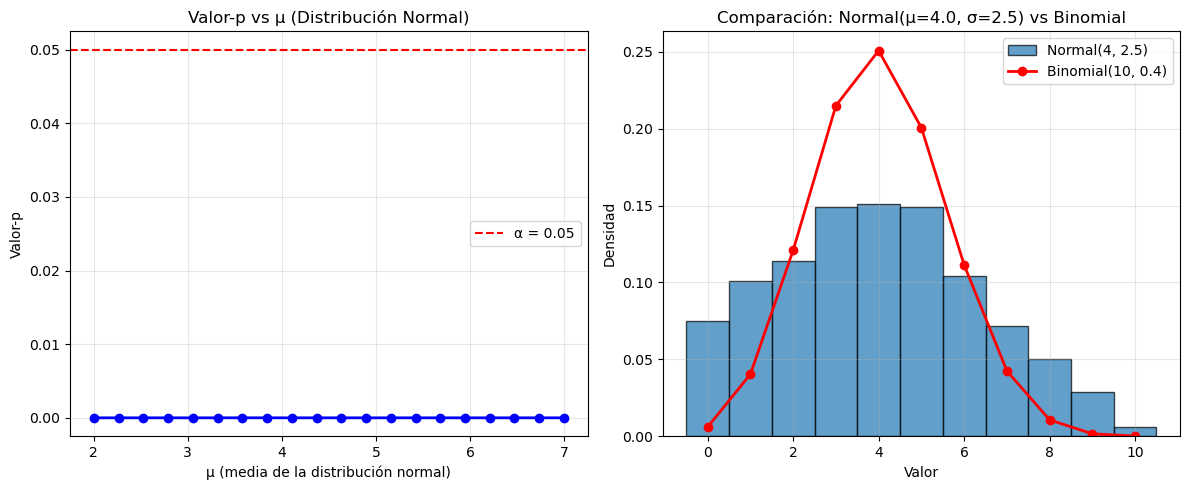


=== PUNTO (f): BINOMIAL GRANDE (n=1000, p=0.4) ===
Parámetros binomial simulada: n=1000, p=0.4
Test contra: Binomial(10, 0.4)
Estadístico chi-cuadrado: 10000.0000
Valor-p: 0.0000
DECISIÓN: Rechazar H0 - Correctamente identifica que son distribuciones diferentes


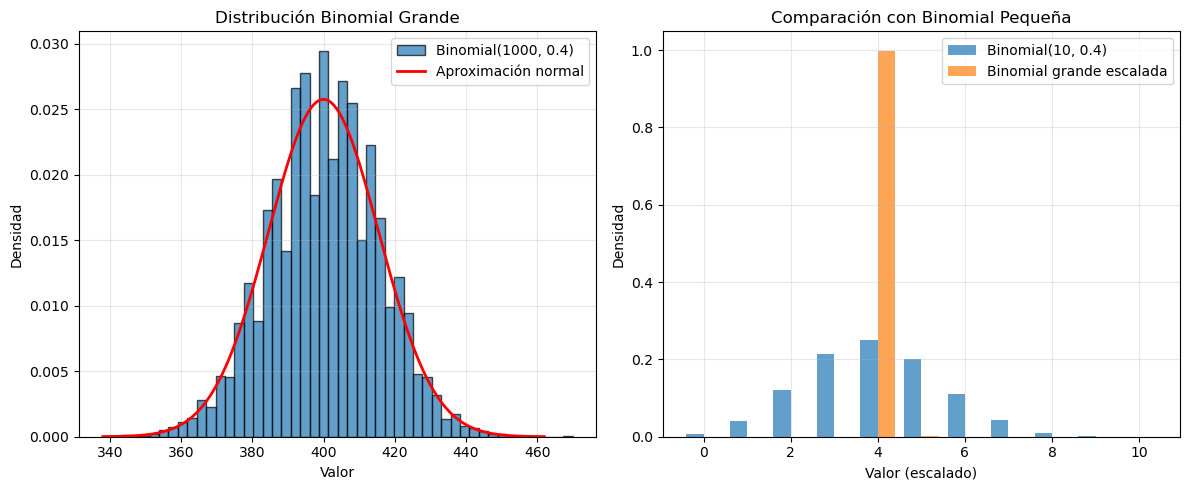


RESUMEN EJERCICIO 10
✓ Punto (a): Datos binomiales simulados y frecuencias calculadas
✓ Puntos (b)-(c): Estadístico chi-cuadrado y prueba de hipótesis realizados
✓ Punto (d): Valor-p calculado e interpretado
✓ Punto (e): Estudio de confusión con distribución normal completado
✓ Punto (f): Análisis con binomial grande realizado
✓ Conclusión general: El test chi-cuadrado es efectivo para distinguir
  distribuciones, pero puede haber confusión en ciertos casos particulares


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom, norm, chi2
import seaborn as sns

#%%
# FUNCIÓN PARA EL TEST DE CHI-CUADRADO
def test_chi_cuadrado_binomial(datos_observados, n_binomial=10, p_binomial=0.4):
    """
    Realiza test de chi-cuadrado para comparar datos con distribución binomial
    
    Parameters:
    datos_observados: array con los datos observados
    n_binomial, p_binomial: parámetros de la distribución binomial teórica
    
    Returns:
    chi2_stat: estadístico chi-cuadrado
    p_value: valor-p del test
    grados_libertad: grados de libertad
    frec_observadas: frecuencias observadas
    frec_esperadas: frecuencias esperadas
    """
    
    # Calcular frecuencias observadas
    valores_posibles = np.arange(0, n_binomial + 1)
    frec_observadas, _ = np.histogram(datos_observados, bins=np.arange(-0.5, n_binomial + 1.5))
    
    # Calcular frecuencias esperadas
    frec_esperadas = binom.pmf(valores_posibles, n_binomial, p_binomial) * len(datos_observados)
    
    # Combinar categorías con frecuencia esperada < 5 (regla práctica)
    frec_obs_combinadas = []
    frec_esp_combinadas = []
    
    i = 0
    while i < len(frec_esperadas):
        if frec_esperadas[i] >= 5:
            frec_obs_combinadas.append(frec_observadas[i])
            frec_esp_combinadas.append(frec_esperadas[i])
            i += 1
        else:
            # Combinar categorías hasta que la frecuencia esperada sea >= 5
            suma_obs = frec_observadas[i]
            suma_esp = frec_esperadas[i]
            j = i + 1
            while j < len(frec_esperadas) and suma_esp < 5:
                suma_obs += frec_observadas[j]
                suma_esp += frec_esperadas[j]
                j += 1
            frec_obs_combinadas.append(suma_obs)
            frec_esp_combinadas.append(suma_esp)
            i = j
    
    frec_obs_combinadas = np.array(frec_obs_combinadas)
    frec_esp_combinadas = np.array(frec_esp_combinadas)
    
    # Calcular estadístico chi-cuadrado
    chi2_stat = np.sum((frec_obs_combinadas - frec_esp_combinadas)**2 / frec_esp_combinadas)
    
    # Grados de libertad: (número de categorías - 1 - parámetros estimados)
    # En este caso no estimamos parámetros de la binomial
    grados_libertad = len(frec_obs_combinadas) - 1
    
    # Calcular valor-p
    p_value = 1 - chi2.cdf(chi2_stat, grados_libertad)
    
    return chi2_stat, p_value, grados_libertad, frec_observadas, frec_esperadas

#%%
# (a) SIMULAR 100 OBSERVACIONES BINOMIALES
def punto_a():
    """Punto (a): Simular datos binomiales y calcular frecuencias"""
    print("=== PUNTO (a): SIMULACIÓN DE DATOS BINOMIALES ===")
    
    n_binomial = 10
    p_binomial = 0.4
    n_observaciones = 100
    
    # Simular datos
    datos_binomial = binom.rvs(n=n_binomial, p=p_binomial, size=n_observaciones)
    
    # Calcular frecuencias
    valores_posibles = np.arange(0, n_binomial + 1)
    frecuencias, _ = np.histogram(datos_binomial, bins=np.arange(-0.5, n_binomial + 1.5))
    
    print(f"Parámetros binomial: n={n_binomial}, p={p_binomial}")
    print(f"Número de observaciones: {n_observaciones}")
    print(f"Datos simulados (primeros 10): {datos_binomial[:10]}")
    print(f"Frecuencias observadas: {frecuencias}")
    
    # Visualizar
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(datos_binomial, bins=np.arange(-0.5, n_binomial + 1.5), 
             alpha=0.7, edgecolor='black', density=True)
    # Distribución teórica
    x_teorico = np.arange(0, n_binomial + 1)
    plt.plot(x_teorico, binom.pmf(x_teorico, n_binomial, p_binomial), 
             'ro-', linewidth=2, label='Binomial teórica')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title('Distribución de los datos simulados')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    # Gráfico de barras de frecuencias
    x_pos = np.arange(len(valores_posibles))
    plt.bar(x_pos - 0.2, frecuencias, width=0.4, alpha=0.7, 
            label='Observado', color='blue')
    plt.bar(x_pos + 0.2, binom.pmf(valores_posibles, n_binomial, p_binomial) * n_observaciones, 
            width=0.4, alpha=0.7, label='Esperado', color='red')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title('Frecuencias Observadas vs Esperadas')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return datos_binomial, frecuencias

#%%
# (b) y (c) CÁLCULO DEL ESTADÍSTICO Y PRUEBA DE HIPÓTESIS
def punto_bc(datos):
    """Puntos (b) y (c): Calcular estadístico y realizar prueba de hipótesis"""
    print("\n=== PUNTOS (b) y (c): ESTADÍSTICO CHI-CUADRADO Y PRUEBA DE HIPÓTESIS ===")
    
    n_binomial = 10
    p_binomial = 0.4
    alpha = 0.05  # Nivel de significancia
    
    # Aplicar test chi-cuadrado
    chi2_stat, p_value, gl, frec_obs, frec_esp = test_chi_cuadrado_binomial(
        datos, n_binomial, p_binomial)
    
    print(f"Estadístico chi-cuadrado: {chi2_stat:.4f}")
    print(f"Grados de libertad: {gl}")
    print(f"Valor-p: {p_value:.4f}")
    print(f"Nivel de significancia: α = {alpha}")
    
    # Valor crítico
    chi2_critico = chi2.ppf(1 - alpha, gl)
    print(f"Valor crítico chi-cuadrado: {chi2_critico:.4f}")
    
    # Decisión de la prueba de hipótesis
    if p_value < alpha:
        print("✓ DECISIÓN: Rechazar H0 - Los datos NO siguen la distribución binomial")
        decision = "Rechazar H0"
    else:
        print("✓ DECISIÓN: No rechazar H0 - Los datos PODRÍAN seguir la distribución binomial")
        decision = "No rechazar H0"
    
    # Hipótesis
    print("\n--- PRUEBA DE HIPÓTESIS ---")
    print("H0: Los datos siguen una distribución Binomial(10, 0.4)")
    print("H1: Los datos NO siguen una distribución Binomial(10, 0.4)")
    print(f"Estadístico de prueba: χ² = {chi2_stat:.4f}")
    print(f"Región de rechazo: χ² > {chi2_critico:.4f}")
    print(f"Valor-p: {p_value:.4f}")
    print(f"Decisión: {decision}")
    
    # Visualización de la distribución chi-cuadrado
    plt.figure(figsize=(10, 6))
    
    x_chi = np.linspace(0, max(chi2_stat * 1.5, chi2_critico * 1.5), 1000)
    y_chi = chi2.pdf(x_chi, gl)
    
    plt.plot(x_chi, y_chi, 'b-', linewidth=2, label=f'Distribución χ²({gl})')
    plt.axvline(chi2_critico, color='red', linestyle='--', 
                label=f'Valor crítico = {chi2_critico:.4f}')
    plt.axvline(chi2_stat, color='green', linestyle='--', 
                label=f'Estadístico observado = {chi2_stat:.4f}')
    
    # Sombrear región de rechazo
    x_rechazo = np.linspace(chi2_critico, max(x_chi), 100)
    plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, gl), alpha=0.3, color='red',
                    label='Región de rechazo')
    
    # Sombrear valor-p si es menor que alpha
    if chi2_stat > chi2_critico:
        x_pvalue = np.linspace(chi2_stat, max(x_chi), 100)
        plt.fill_between(x_pvalue, chi2.pdf(x_pvalue, gl), alpha=0.3, color='green',
                        label=f'Valor-p = {p_value:.4f}')
    
    plt.xlabel('χ²')
    plt.ylabel('Densidad de probabilidad')
    plt.title('Distribución Chi-Cuadrado y Prueba de Hipótesis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return chi2_stat, p_value, gl, decision

#%%
# (d) CÁLCULO DEL VALOR-P
def punto_d(p_value):
    """Punto (d): Interpretación del valor-p"""
    print("\n=== PUNTO (d): INTERPRETACIÓN DEL VALOR-P ===")
    
    print(f"Valor-p calculado: {p_value:.4f}")
    
    if p_value < 0.01:
        interpretacion = "Evidencia muy fuerte contra H0"
    elif p_value < 0.05:
        interpretacion = "Evidencia fuerte contra H0"
    elif p_value < 0.10:
        interpretacion = "Evidencia débil contra H0"
    else:
        interpretacion = "Poca o ninguna evidencia contra H0"
    
    print(f"Interpretación: {interpretacion}")
    print(f"El valor-p representa la probabilidad de obtener un estadístico")
    print(f"chi-cuadrado igual o más extremo que el observado, asumiendo que H0 es verdadera.")
    
    return interpretacion

#%%
# (e) ESTUDIO CON DISTRIBUCIÓN NORMAL
def punto_e():
    """Punto (e): Estudiar confusión con distribución normal"""
    print("\n=== PUNTO (e): ESTUDIO CON DISTRIBUCIÓN NORMAL ===")
    
    n_observaciones = 100
    sigma = 2.5
    mu_values = np.linspace(2, 7, 20)  # Valores de mu entre 2 y 7
    n_binomial = 10
    p_binomial = 0.4
    
    p_values = []
    decisiones = []
    
    for mu in mu_values:
        # Generar datos normales (redondear a enteros para comparar con binomial)
        datos_normales = np.round(norm.rvs(loc=mu, scale=sigma, size=n_observaciones))
        # Asegurar que estén en el rango [0, 10]
        datos_normales = np.clip(datos_normales, 0, n_binomial)
        
        # Aplicar test chi-cuadrado
        chi2_stat, p_value, gl, _, _ = test_chi_cuadrado_binomial(
            datos_normales, n_binomial, p_binomial)
        
        p_values.append(p_value)
        decisiones.append(p_value >= 0.05)  # True si no se rechaza H0
    
    # Encontrar rango donde no se rechaza H0 (se "confunde")
    indices_no_rechazo = np.where(np.array(decisiones))[0]
    if len(indices_no_rechazo) > 0:
        mu_confusion = mu_values[indices_no_rechazo]
        print(f"Rango de μ donde NO se rechaza H0 (confusión): {mu_confusion[0]:.2f} a {mu_confusion[-1]:.2f}")
    else:
        print("No se encontró rango de μ donde no se rechace H0")
    
    # Visualización
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(mu_values, p_values, 'bo-', linewidth=2)
    plt.axhline(0.05, color='red', linestyle='--', label='α = 0.05')
    plt.xlabel('μ (media de la distribución normal)')
    plt.ylabel('Valor-p')
    plt.title('Valor-p vs μ (Distribución Normal)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    # Mostrar un ejemplo de distribución normal que podría confundirse
    mu_ejemplo = 4.0  # Media donde típicamente hay confusión
    datos_ejemplo = np.round(norm.rvs(loc=mu_ejemplo, scale=sigma, size=1000))
    datos_ejemplo = np.clip(datos_ejemplo, 0, n_binomial)
    
    plt.hist(datos_ejemplo, bins=np.arange(-0.5, n_binomial + 1.5), 
             alpha=0.7, density=True, edgecolor='black', label='Normal(4, 2.5)')
    x_teorico = np.arange(0, n_binomial + 1)
    plt.plot(x_teorico, binom.pmf(x_teorico, n_binomial, p_binomial), 
             'ro-', linewidth=2, label='Binomial(10, 0.4)')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title(f'Comparación: Normal(μ={mu_ejemplo}, σ=2.5) vs Binomial')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return mu_values, p_values, decisiones

#%%
# (f) ESTUDIO CON BINOMIAL GRANDE
def punto_f():
    """Punto (f): Estudio con binomial de parámetros grandes"""
    print("\n=== PUNTO (f): BINOMIAL GRANDE (n=1000, p=0.4) ===")
    
    n_binomial_grande = 1000
    p_binomial_grande = 0.4
    n_observaciones = 10000
    
    # Simular datos de binomial grande
    datos_binomial_grande = binom.rvs(n=n_binomial_grande, p=p_binomial_grande, 
                                     size=n_observaciones)
    
    # Aplicar test chi-cuadrado contra binomial(10, 0.4)
    chi2_stat, p_value, gl, frec_obs, frec_esp = test_chi_cuadrado_binomial(
        datos_binomial_grande, n_binomial=10, p_binomial=0.4)
    
    print(f"Parámetros binomial simulada: n={n_binomial_grande}, p={p_binomial_grande}")
    print(f"Test contra: Binomial(10, 0.4)")
    print(f"Estadístico chi-cuadrado: {chi2_stat:.4f}")
    print(f"Valor-p: {p_value:.4f}")
    
    if p_value < 0.05:
        print("DECISIÓN: Rechazar H0 - Correctamente identifica que son distribuciones diferentes")
    else:
        print("DECISIÓN: No rechazar H0 - Se confunden las distribuciones")
    
    # Visualización comparativa
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    # Histograma de la binomial grande (normalizado)
    plt.hist(datos_binomial_grande, bins=50, alpha=0.7, density=True, 
             edgecolor='black', label=f'Binomial({n_binomial_grande}, {p_binomial_grande})')
    
    # Aproximación normal para binomial grande
    mu_grande = n_binomial_grande * p_binomial_grande
    sigma_grande = np.sqrt(n_binomial_grande * p_binomial_grande * (1 - p_binomial_grande))
    x_norm = np.linspace(mu_grande - 4*sigma_grande, mu_grande + 4*sigma_grande, 1000)
    plt.plot(x_norm, norm.pdf(x_norm, mu_grande, sigma_grande), 'r-', linewidth=2,
             label='Aproximación normal')
    
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.title('Distribución Binomial Grande')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    # Comparación con binomial(10, 0.4)
    x_pequeno = np.arange(0, 11)
    plt.bar(x_pequeno - 0.2, binom.pmf(x_pequeno, 10, 0.4), width=0.4, alpha=0.7,
            label='Binomial(10, 0.4)')
    
    # Escalar la binomial grande al rango [0, 10] para comparar
    datos_escalados = datos_binomial_grande / n_binomial_grande * 10
    hist_escalado, _ = np.histogram(datos_escalados, bins=np.arange(-0.5, 11.5))
    hist_escalado = hist_escalado / len(datos_escalados)  # Normalizar
    
    plt.bar(x_pequeno + 0.2, hist_escalado, width=0.4, alpha=0.7,
            label='Binomial grande escalada')
    
    plt.xlabel('Valor (escalado)')
    plt.ylabel('Densidad')
    plt.title('Comparación con Binomial Pequeña')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return datos_binomial_grande, chi2_stat, p_value

#%%
# FUNCIÓN PRINCIPAL QUE EJECUTA TODOS LOS PUNTOS
def ejecutar_ejercicio_completo():
    """Ejecuta todos los puntos del ejercicio 10"""
    
    print("=" * 60)
    print("EJERCICIO 10: TEST DE CHI-CUADRADO")
    print("=" * 60)
    
    # Punto (a)
    datos_binomial, frecuencias = punto_a()
    
    # Puntos (b) y (c)
    chi2_stat, p_value, gl, decision = punto_bc(datos_binomial)
    
    # Punto (d)
    interpretacion = punto_d(p_value)
    
    # Punto (e)
    mu_values, p_values, decisiones = punto_e()
    
    # Punto (f)
    datos_binomial_grande, chi2_grande, p_value_grande = punto_f()
    
    # RESUMEN FINAL
    print("\n" + "=" * 60)
    print("RESUMEN EJERCICIO 10")
    print("=" * 60)
    print("✓ Punto (a): Datos binomiales simulados y frecuencias calculadas")
    print("✓ Puntos (b)-(c): Estadístico chi-cuadrado y prueba de hipótesis realizados")
    print("✓ Punto (d): Valor-p calculado e interpretado")
    print("✓ Punto (e): Estudio de confusión con distribución normal completado")
    print("✓ Punto (f): Análisis con binomial grande realizado")
    print(f"✓ Conclusión general: El test chi-cuadrado es efectivo para distinguir")
    print(f"  distribuciones, pero puede haber confusión en ciertos casos particulares")

#%%
# EJECUCIÓN
if __name__ == "__main__":
    ejecutar_ejercicio_completo()